# Объединение объектов DataFrame
## Полоная документация с большим количеством примеров:  
### https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html¶


In [4]:
import numpy as np
import pandas as pd

## Конкатенация
Конкатенация - "склеивание" двух датафреймов по колонкам. Данный метод можно использовать когда оба датафрейма имеют одинаковый формат. Например два датафрейма с одинаковым количеством строк и с одинаковым индексом: 

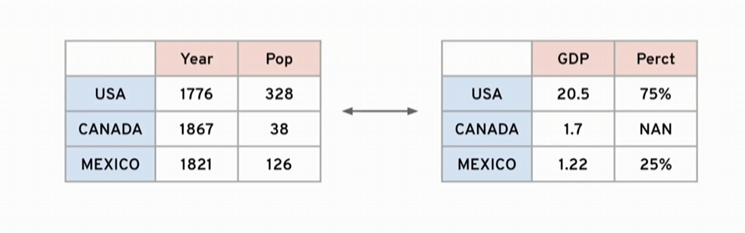

Поскольку количество строк одинаково, можно объединить эти два датафрейма __по колонкам__:  

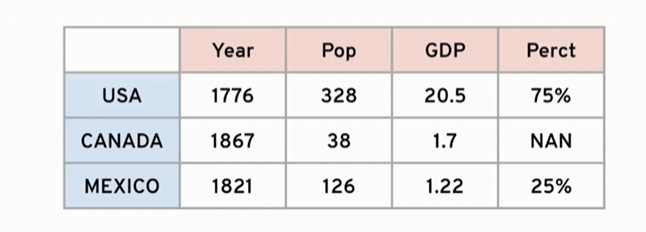

Также можно выполнять конкатенацию __по строкам__, для этого два датафрейма должны иметь одинаковые колонки, но каждый датафрейм содержит разные строки:

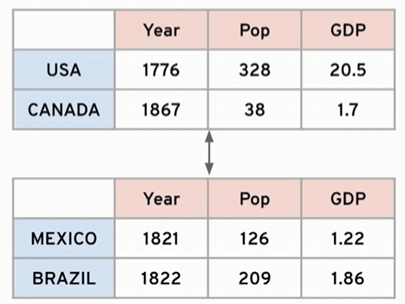

В результате конкатенации получается датафрейм с четырьмя строками:

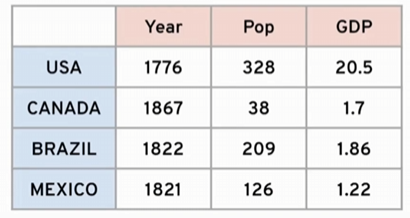

*__Pandas будет автоматически обрабатывать значания NaN__*

In [15]:
data_one = {'A':['A0', 'A1', 'A2', 'A3'], 'B':['B0', 'B1', 'B2', 'B3']}

In [17]:
data_two = {'C':['C0', 'C1', 'C2', 'C3'], 'D':['D0', 'D1', 'D2', 'D3']}

In [21]:
one = pd.DataFrame(data_one)
one

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [23]:
two = pd.DataFrame(data_two)
two

,C,D
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


### Конкатенация по колонкам (axis=1)

In [30]:
# Индекс останется таким же, так как он одинаковый в обоих датафреймах
pd.concat([one, two], axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


*__Важно: порядок передачи датафреймов в списке - имеет значение!__*

In [33]:
# Результат будет другим
pd.concat([two, one], axis=1)

,C,D,A,B
0,C0,D0,A0,B0
1,C1,D1,A1,B1
2,C2,D2,A2,B2
3,C3,D3,A3,B3


### Конкатенация по строкам (axis=0)
Так как в наших датафреймах колонки имеют разное название, выполнение операции __pd.concat([one, two], axis=0)__ может принять неожиданный результат. По умолчанию Pandas заполнит недостающие ячейки значениями NaN.

In [41]:
pd.concat([one, two], axis=0)

,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,A3,B3,NaN,NaN
0,NaN,NaN,C0,D0
1,NaN,NaN,C1,D1
2,NaN,NaN,C2,D2
3,NaN,NaN,C3,D3


Это слуилось из-за того, что при выполнении конкатенации Pandas не находит нужные колонки и добавляет их самомтоятельно и заполняет значения с помощью NaN.

Если действительно необходимо объединить эти два датафрейма и переименовать колонки __C__ и __D__ в __A__ и __B__, можно дейтвовать следующим образом:

In [48]:
# Для начала, переименуем колонки
two.columns = one.columns
two

,A,B
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


In [50]:
# После чего можно выполнять объединение
pd.concat([one, two], axis=0)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


*__Чтобы избежать дублирования индекса, можно сделать так:__*

In [55]:
my_df = pd.concat([one, two], axis=0)
my_df.index = range(len(my_df))
my_df

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,C0,D0
5,C1,D1
6,C2,D2
7,C3,D3


In [59]:
# Либо можно воспользоваться параметром ignore_index=True
pd.concat([one, two], axis=0, ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,C0,D0
5,C1,D1
6,C2,D2
7,C3,D3


## Соединение (Merge)

Довольно часто датафреймы имеют разный формат, и  поэтому их нельзя объединятьс помощью конкатенации. В этом случае применяется слияние - merge.

### Таблицы с данными

In [64]:
registrations = pd.DataFrame({'reg_id':[1, 2, 3, 4], 'name':['Andrew', 'Bob', 'Claire', 'David']})
logins = pd.DataFrame({'log_id':[1, 2, 3, 4], 'name':['Xavier', 'Andrew', ' Yolanda', 'Bob']})

In [66]:
# Данные о предварительной регистрации пользователей
registrations

,reg_id,name
0,1,Andrew
1,2,Bob
2,3,Claire
3,4,David


In [68]:
# Входы на сайт
logins

,log_id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bob


### Метод pd.merge()
Соединяет объекты pandas DataFrame на основе ключевых колонок, по аналогии с соединениями JOIN в SQL. Различные виды соединения (внешнее outer, внутреннее inner) можно указать с помощью параметра __how__.

Метод .merge() принимает на вход параметр __how__. 
Есть три осноных способа:
* Inner
* Outer
* Left или Right

Этот параметр влияет на то, как будут обрабатываться данные, которые существуют только в одном из двух датафреймов.

Также необходимо решить по какой колонке будут объединяться данные (параметр __on__). При выборе колонок необходимо придерживаться двух правил:
1. __Колонка должна являться первичным ключём, т.е. содержать уникальные значения для каждой строки__
2. __Колонка должна присутствовать в обеих таблицах, и в ней должны быть одинаковые по смыслу данные__

In [73]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left: 'DataFrame | Series', right: 'DataFrame | Series', how: 'MergeHow' = 'inner', on: 'IndexLabel | AnyArrayLike | None' = None, left_on: 'IndexLabel | AnyArrayLike | None' = None, right_on: 'IndexLabel | AnyArrayLike | None' = None, left_index: 'bool' = False, right_index: 'bool' = False, sort: 'bool' = False, suffixes: 'Suffixes' = ('_x', '_y'), copy: 'bool | None' = None, indicator: 'str | bool' = False, validate: 'str | None' = None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    A named Series object is treated as a DataFrame with a single named column.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    When performing a cross merge, no column specifications to merge on are
    allo

## Виды соединений - Inner, Left, Right и Outer Joins

### Внутреннее соединение - Inner Join

Соединяет строки, для которых ключ присутствует в __ОБЕИХ__ таблицах. В результате такого соединения сы не получим значений NaN, потому что по определению значения в ключевых колонках должны существовать в обеих таблицах. Если посмотреть на таблицы registrations и logins, то только два человека - Andrew и Bob - присутствуют в обеих таблицах.

Так на картинке пересечение диаграмм - это те значения колонки __name__, которые присутствуют в обеих таблицах.

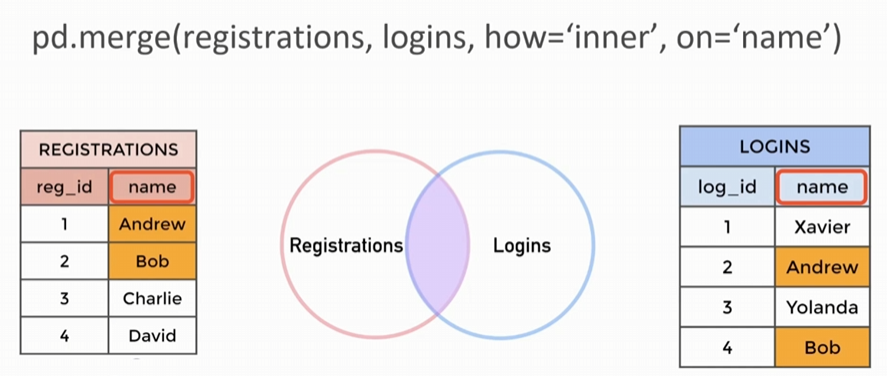

Синтаксис по шагам:
1. Выбираем колонку соединения - в нашем случае - колонка __name__
2. Поскольку это __Inner Join__ - выбираются только те значения __name__, которые  присутствуют в обеих талицах
3. Соответствующие строки (reg_id и log_id) объединяются между собой

Получаемый результат выглядит следующим образом:

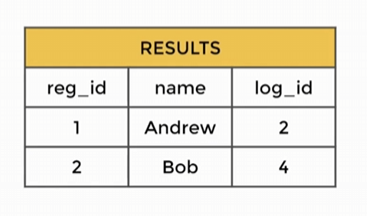

Для __Inner Merge__ не важно какая таблица будет указана первой, так как мы берем данные, существующие в обих таблицах. Однако в результате может поменяться порядок колонок и порядок строк.

In [88]:
pd.merge(registrations, logins, how='inner', on='name')

,reg_id,name,log_id
0,1,Andrew,2
1,2,Bob,4


In [91]:
pd.merge(logins, registrations, how='inner', on='name')

,log_id,name,reg_id
0,2,Andrew,1
1,4,Bob,2


### Левое соединение - Left Join
Для данного способа __ВАЖЕН__ порядок указания датафреймов!

Находит соответствующие строки И включает в результат __все строки__ из левой таблицы (если смотреть на список таблиц - левая таблица - это та таблица, которая находится слева в этом списке).

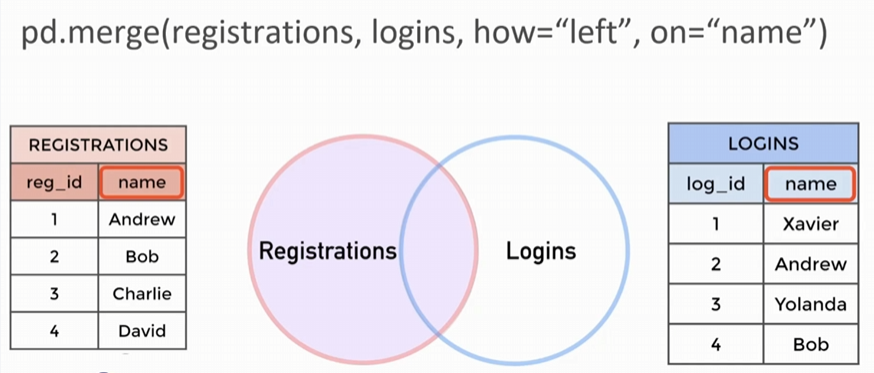

В примере будут выведены все строки из левой таблицы registrations, и, если у них нет строки в таблице logins, заполненные значениями NaN колонки.

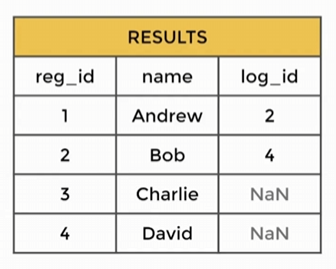

In [102]:
# Можно явно укзать датафреймы с помощью left= и right=
pd.merge(left=registrations, right=logins, how='left', on='name')

,reg_id,name,log_id
0,1,Andrew,2.0
1,2,Bob,4.0
2,3,Claire,NaN
3,4,David,NaN


### Правое соединение - Right Join
Для этого способа __ВАЖЕН__ порядок указания датафреймов!

Находит соответствующие строки И включает в результат все строки из правой таблицы.

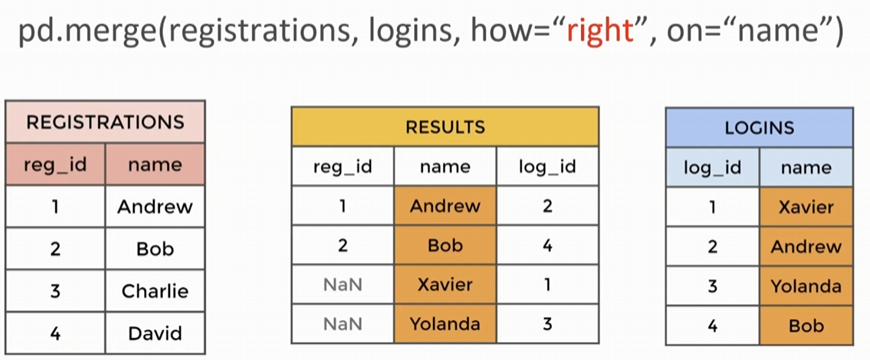

Будут отображены все строки из правой таблицы, и если нет для них соответствия в левой таблице, то в колонках из левой таблицы запишутся значения NaN.

In [104]:
pd.merge(left=registrations, right=logins, how='right', on='name')

,reg_id,name,log_id
0,NaN,Xavier,1
1,1.0,Andrew,2
2,NaN,Yolanda,3
3,2.0,Bob,4


### Внешнее соединение - Outer Join

Метод __Outer Join__ похож на __Inner Join__ тем, что для него также не важен порядок указания датафреймов.

Позволяет включить в результат все строки, которые существуют хотя бы в одной из двух таблиц. В нашем пример это все строки из таблицы registrations и из таблицы logins. Там, где не нашлись соответствующие строки, запишутся значения NaN.

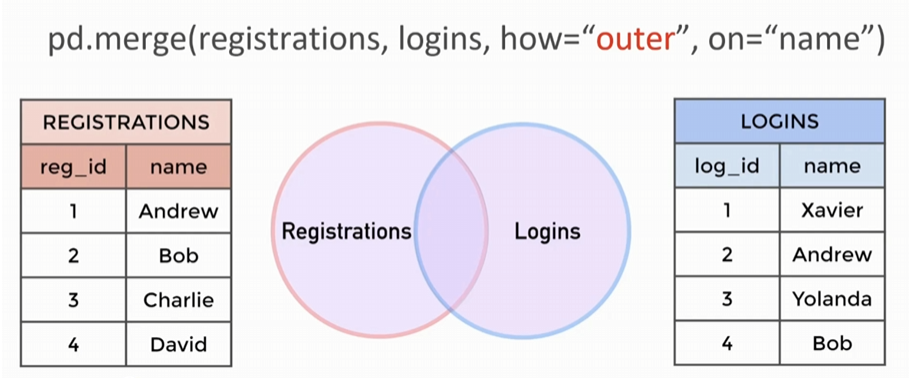

Результат объединения будет выглядеть следующим образом:

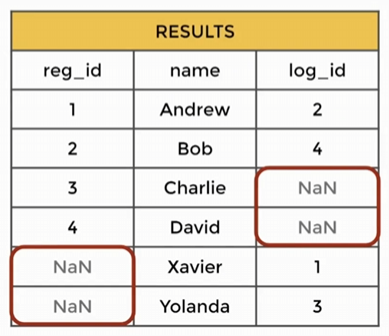

Если сравнивать эту терминологию с языком SQL, то в SQL эта операция называется FULL OUTER JOIN. А операции LEFT JOIN и RIGHT JOIN в языке SQL называются соответственно LEFT OUTER JOIN и RIGHT OUTER JOIN.

In [108]:
pd.merge(registrations, logins, how='outer', on='name')

,reg_id,name,log_id
0,NaN,Yolanda,3.0
1,1.0,Andrew,2.0
2,2.0,Bob,4.0
3,3.0,Claire,NaN
4,4.0,David,NaN
5,NaN,Xavier,1.0


### Соединение по индексу или колонке

Чтобы явно указать, по какому индексу или колонке выполнять соединение, можно использовать параметры __left_on__, __right_on__, __left_index__, __right_index__.

__left_on__ и __right_on__ можно использовать, когда колонки называются по-разному.

In [113]:
registrations = registrations.set_index('name')
registrations

,reg_id
name,
Andrew,1
Bob,2
Claire,3
David,4


In [115]:
logins

,log_id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bob


In [121]:
pd.merge(registrations, logins, left_index=True, right_on='name', how='inner')

,reg_id,log_id,name
1,1,2,Andrew
3,2,4,Bob


### Когда колонки называются по-разному

In [124]:
registrations = registrations.reset_index()
registrations

,name,reg_id
0,Andrew,1
1,Bob,2
2,Claire,3
3,David,4


In [127]:
registrations.columns = ['reg_name', 'reg_id']
registrations

,reg_name,reg_id
0,Andrew,1
1,Bob,2
2,Claire,3
3,David,4


In [129]:
logins

,log_id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bob


In [ ]:
# Такая команда приведёт к ошибке, потому что непонятно, по каким колонкам соединять датафреймы
# pd.merge(registrations,logins)

In [131]:
pd.merge(registrations, logins, how='inner', left_on='reg_name', right_on='name')

,reg_name,reg_id,log_id,name
0,Andrew,1,2,Andrew
1,Bob,2,4,Bob


In [139]:
results = pd.merge(registrations, logins, how='inner', left_on='reg_name', right_on='name')
results

,reg_name,reg_id,log_id,name
0,Andrew,1,2,Andrew
1,Bob,2,4,Bob


In [143]:
results.drop('reg_name', axis=1)

,reg_id,log_id,name
0,1,2,Andrew
1,2,4,Bob


In [145]:
# Можно сразу так
pd.merge(registrations,logins,left_on='reg_name',right_on='name').drop('reg_name',axis=1)

,reg_id,log_id,name
0,1,2,Andrew
1,2,4,Bob


### Pandas автоматически добавляет суффиксы для дублирующихся названий колонок

In [152]:
registrations.columns = ['name', 'id']
registrations

,name,id
0,Andrew,1
1,Bob,2
2,Claire,3
3,David,4


In [154]:
logins.columns = ['id', 'name']
logins

,id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bob


In [156]:
# _x для левой таблицы
# _y для правой таблицы
pd.merge(registrations, logins, how='inner', on='name')

,name,id_x,id_y
0,Andrew,1,2
1,Bob,2,4


In [158]:
# Можно указать свои суффиксы
pd.merge(registrations, logins, how='inner', on='name', suffixes=('_reg', '_log'))

,name,id_reg,id_log
0,Andrew,1,2
1,Bob,2,4
